In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **Limpieza de Datos:**
- **Identificación y eliminación de valores duplicados:** Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [2]:
def check_duplicates(df, columns=None):
    """
    Comprehensive duplicate checker for a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): DataFrame to check for duplicates
    columns (list, optional): Specific columns to check for duplicates. If None, checks all columns
    
    Returns:
    dict: Dictionary containing duplicate analysis results
    """
    # Initialize results dictionary
    results = {}
    
    # Check entire rows if no columns specified
    if columns is None:
        columns = df.columns.tolist()
    
    # Get duplicate rows
    duplicates = df.duplicated(subset=columns, keep='first')
    duplicate_df = df[duplicates]
    
    # Get rows with their duplicate counts
    duplicate_counts = df.duplicated(subset=columns, keep=False)
    value_counts = df[duplicate_counts][columns].value_counts()
    
    # Compile results
    results['has_duplicates'] = duplicates.any()
    results['total_duplicate_rows'] = duplicates.sum()
    results['duplicate_percentage'] = (duplicates.sum() / len(df) * 100).round(2)
    results['duplicate_rows'] = duplicate_df
    
    # Get index positions of duplicates
    results['duplicate_indices'] = duplicate_df.index.tolist()
    
    # Get most common duplicate values
    results['most_common_duplicates'] = value_counts.head()
    
    # Generate summary
    print(f"Duplicate Analysis Summary:")
    print(f"- Total rows in DataFrame: {len(df)}")
    print(f"- Number of duplicate rows: {results['total_duplicate_rows']}")
    print(f"- Percentage of duplicates: {results['duplicate_percentage']}%")
    
    if results['has_duplicates']:
        print("\nFirst few duplicate values:")
        print(results['most_common_duplicates'])
    
    return results


check_duplicates(df)

Duplicate Analysis Summary:
- Total rows in DataFrame: 768
- Number of duplicate rows: 0
- Percentage of duplicates: 0.0%


{'has_duplicates': np.False_,
 'total_duplicate_rows': np.int64(0),
 'duplicate_percentage': np.float64(0.0),
 'duplicate_rows': Empty DataFrame
 Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
 Index: [],
 'duplicate_indices': [],
 'most_common_duplicates': Series([], Name: count, dtype: int64)}

- **Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [3]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
## Todas las columnas tienen los tipos apropiados de datos, pero por preferencia personal voy a cambiar el Outcome a boolean
df['Outcome'] = df['Outcome'].map({0: False, 1: True})

- **Corrección de inconsistencias en valores categóricos:** Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

In [5]:
#No existen columnas categoricas

- **Manejo de valores faltantes adecuadamente:** Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#No existen valores faltantes

### **Exploración de Datos:**
- **Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

C:\Users\Diego\AppData\Local\Temp\ipykernel_23368\493703557.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlations.values,


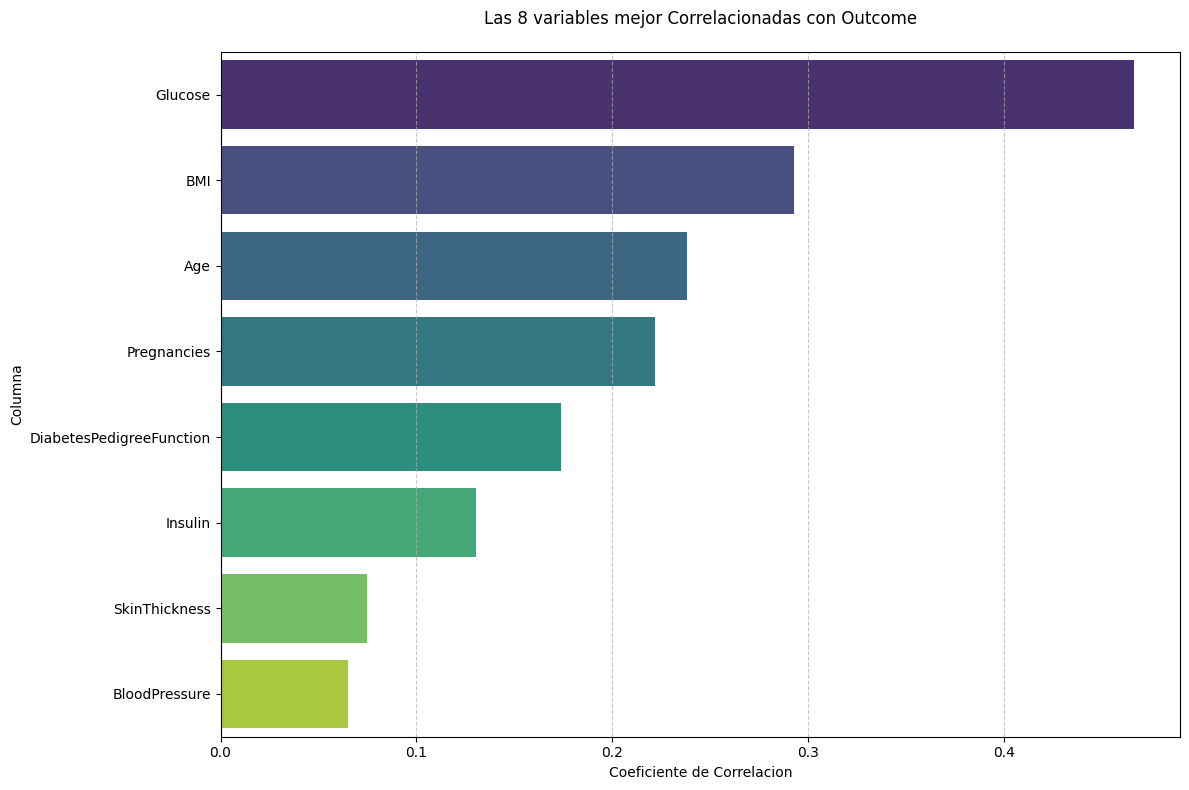

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
n = 8
target = 'Outcome'
correlations = df.corr()[target].sort_values(ascending=False)

# Get top n correlations (excluding the target variable itself)
top_correlations = correlations[1:n+1]

# Create figure with appropriate size
plt.figure(figsize=(12, 8))

# Create barplot
sns.barplot(x=top_correlations.values, 
               y=top_correlations.index, 
            palette='viridis')

# Customize the plot
plt.title(f'Las {n} variables mejor Correlacionadas con {target}', pad=20)
plt.xlabel('Coeficiente de Correlacion')
plt.ylabel('Columna')

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

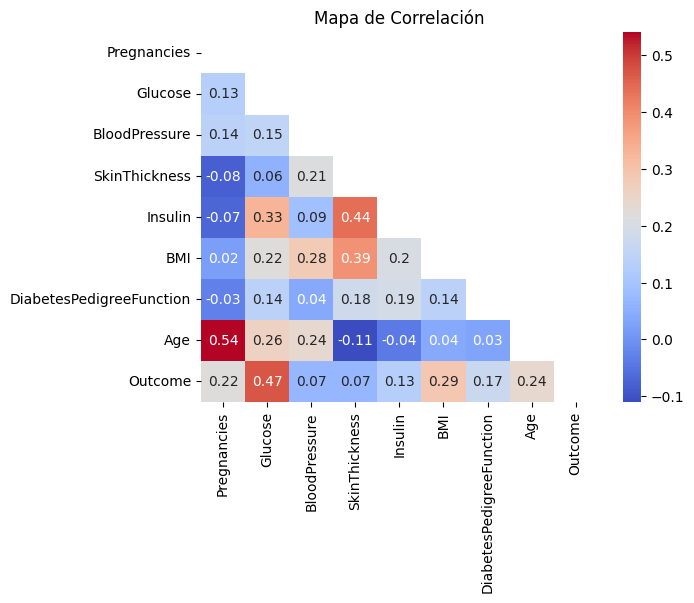

In [9]:
# Crear un heatmap
import numpy as np
corr = df.corr().round(2)
plt.figure()
mask  = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=mask)


plt.title('Mapa de Correlación')
plt.show()

In [10]:
columns = df.columns.tolist()
columns.remove('Outcome')

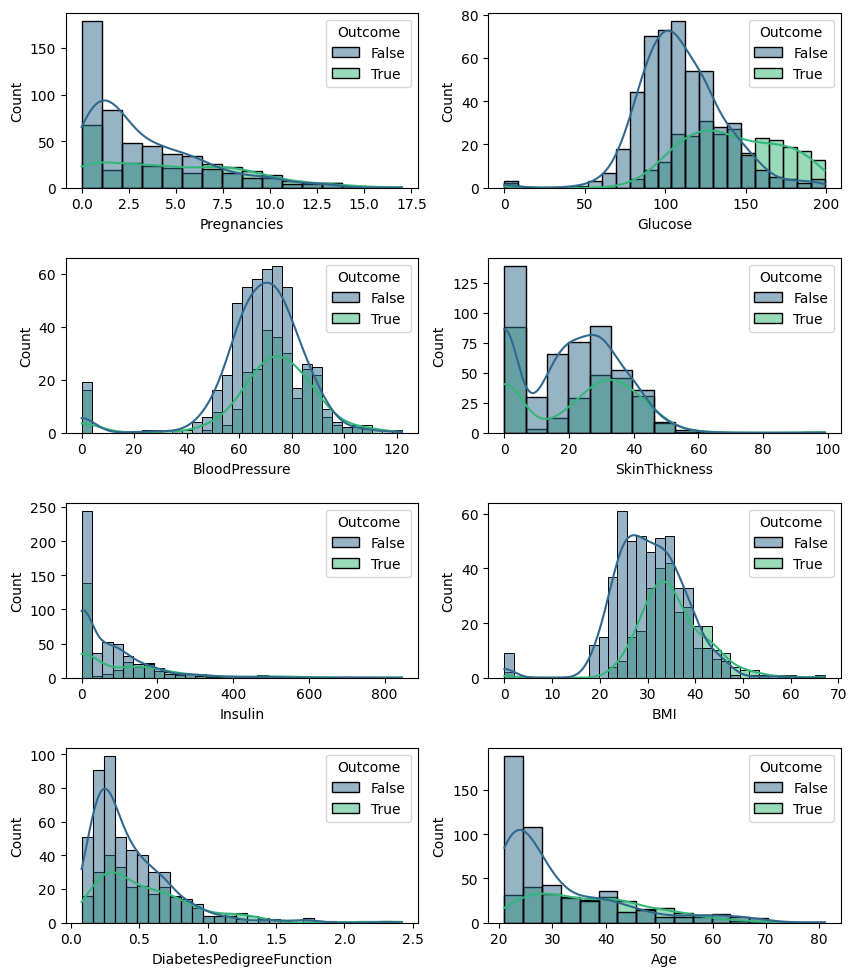

In [11]:
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.4)
i = 1
for name in columns:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue="Outcome",kde=True,palette="viridis")
    i = i + 1

Lo que me llama la atencion de estos histogramas es la cantidad de valores 0 en Insulin, SkinThickness y Blood Pressure, que despues de haber investigado, ninguno puede ser cero.

In [12]:
zero_percentages = (df == 0).mean() * 100
zero_percentages

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

Voy a reemplazar los 0 por el promedio en donde los 0 no tienen sentido

In [13]:
cambiar_por_promedio = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

#Para todas menos el BMI redondeo
for column in cambiar_por_promedio:
    mask = df[column] == 0
    if column == 'BMI':
        df.loc[mask, column] = df[column][~mask].mean()
    else:
        df.loc[mask, column] = df[column][~mask].mean().round(0)

- **Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.688802,72.386719,29.108073,155.768229,32.457464,0.471876,33.240885
std,3.369578,30.435959,12.096642,8.791221,85.021408,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,156.000000,32.400000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,156.000000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


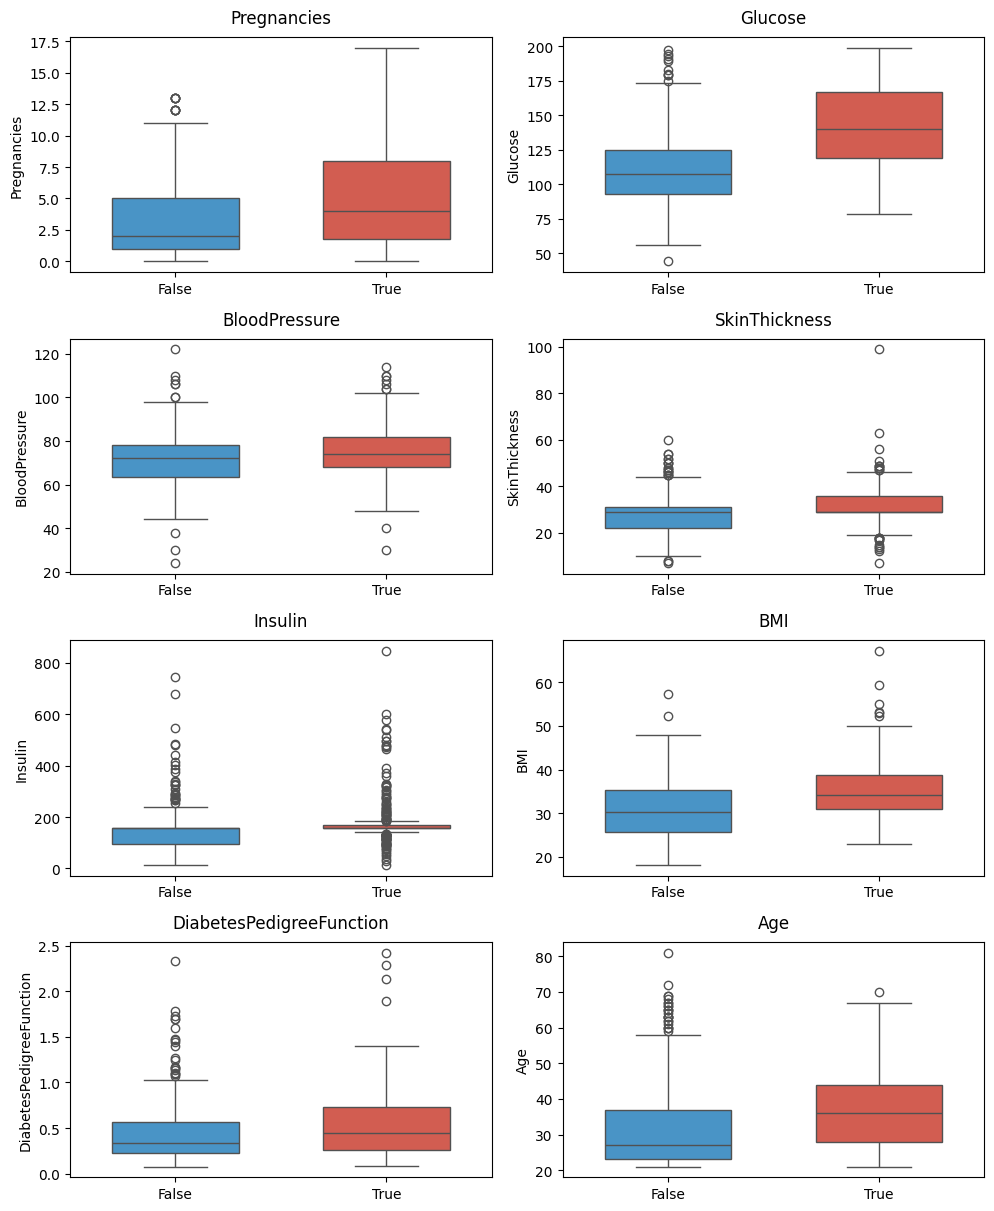

In [15]:
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
i = 1
for name in columns:
    plt.subplot(5, 2, i)
    sns.boxplot(data=df, x="Outcome", y=name, 
                hue="Outcome",
                legend=False,
                width=0.6,
                palette=["#3498db", "#e74c3c"])  # Custom colors for 0 and 1
    plt.title(name, pad=10)
    plt.xlabel("Diabetes" if i > 8 else "")
    i += 1
plt.tight_layout()

In [16]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# 1. Prepare the data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# 2. Create and train the models
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# 3. Make predictions
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)


-------------------- Random Forest Evaluation --------------------
Accuracy: 0.771
Precision: 0.683
Recall: 0.621
F1-score: 0.651
ROC-AUC: 0.735

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.85      0.83       126
        True       0.68      0.62      0.65        66

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192



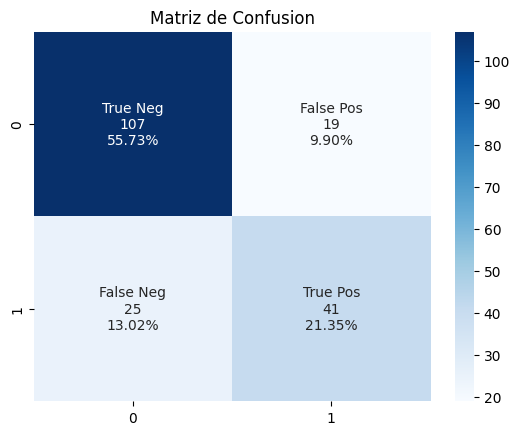

In [17]:
# 4. Function to evaluate and display metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{'-'*20} {model_name} Evaluation {'-'*20}")
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    
    # Print confusion matrix and classification report
    plt.title('Matriz de Confusion')
    cf_matrix = confusion_matrix(y_true, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
  
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# 5. Evaluate both models
evaluate_model(y_test, rf_pred, "Random Forest")





-------------------- XGBoost Evaluation --------------------
Accuracy: 0.760
Precision: 0.652
Recall: 0.652
F1-score: 0.652
ROC-AUC: 0.734

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.82      0.82       126
        True       0.65      0.65      0.65        66

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192



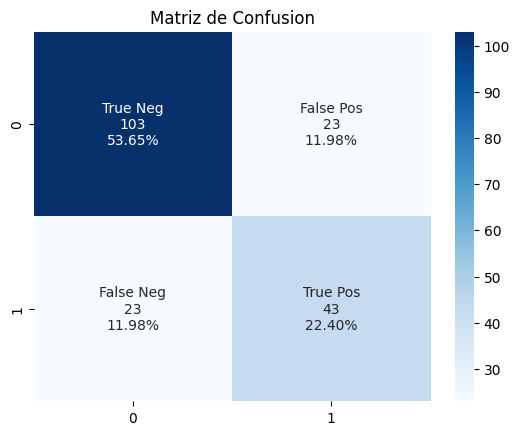

In [18]:
evaluate_model(y_test, xgb_pred, "XGBoost")

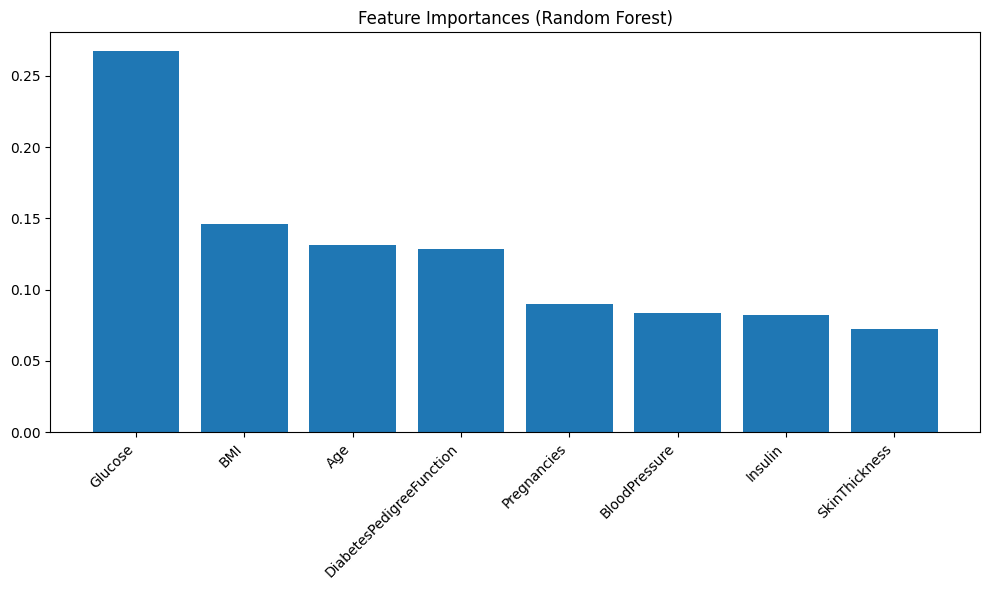

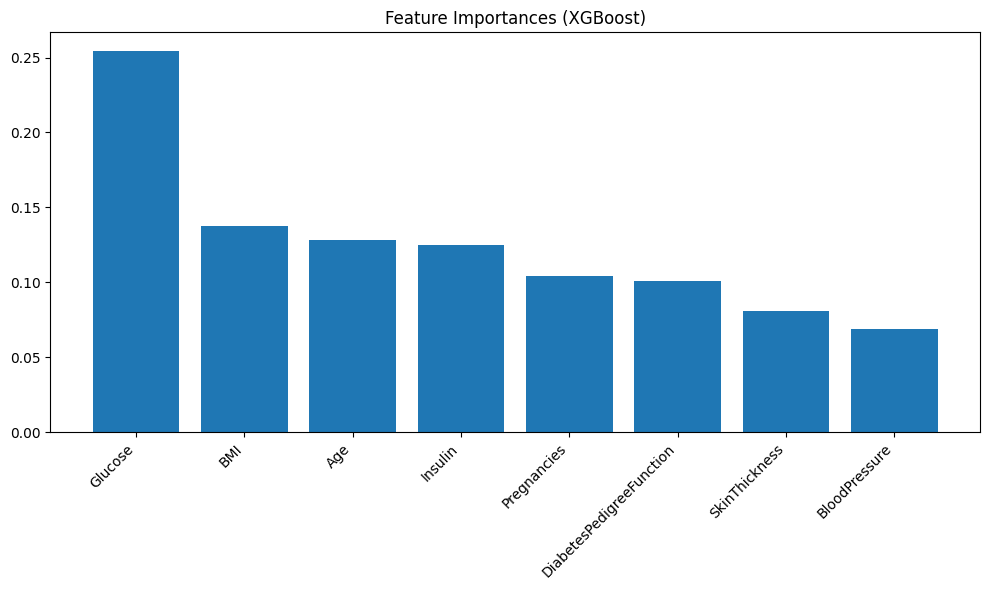

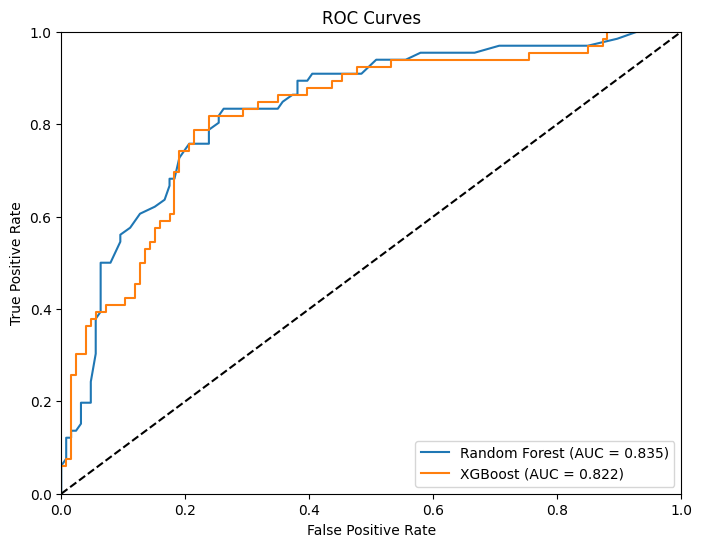

In [19]:
# 6. Feature importance for both models
def plot_feature_importance(model, title, feature_names):
    plt.figure(figsize=(10, 6))
    
    if isinstance(model, RandomForestClassifier):
        importances = model.feature_importances_
    else:  # XGBoost
        importances = model.feature_importances_
        
    indices = np.argsort(importances)[::-1]
    
    plt.title(f"Feature Importances ({title})")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot feature importance
plot_feature_importance(rf_model, "Random Forest", X.columns)
plot_feature_importance(xgb_model, "XGBoost", X.columns)

# 7. ROC curves for both models
from sklearn.metrics import roc_curve

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(8, 6))
    
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves
models = {
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}
plot_roc_curves(models, X_test, y_test)

- **Comparación de Rendimiento:** Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.
Los dos modelos presentan un rendimiento bastante parecido. El random Forest presenta un accuracy un poco mejor, el AUC muy similar. El XGBoost tiene mejor Recall, a cambio de una precision un poco mas baja. Optaria por seguir optimizando ambos modelos antes de decidirme por uno de los dos